In [1]:
import pandas as pd
import numpy as np

In [28]:
data_ads = pd.read_csv("../datasets/ads/Advertising.csv")

In [29]:
data_ads.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [30]:
len(data_ads)

200

In [15]:
#Se aplica la formula de correlacion de parsons entre lo que se gasta en anuncios de Tv y las ventas que producen#
data_ads["corrn"] = (data_ads["TV"] - np.mean(data_ads["TV"]))* (data_ads["Sales"] - np.mean(data_ads["Sales"]))

In [9]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn
0,230.1,37.8,69.2,22.1,670.896956
1,44.5,39.3,45.1,10.4,371.460206
2,17.2,45.9,69.3,9.3,613.181206
3,151.5,41.3,58.5,18.5,19.958456
4,180.8,10.8,58.4,12.9,-37.892794


In [16]:
data_ads["corr1"] = (data_ads["TV"] - np.mean(data_ads["TV"]))**2

In [11]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn,corr1
0,230.1,37.8,69.2,22.1,670.896956,6898.548306
1,44.5,39.3,45.1,10.4,371.460206,10514.964306
2,17.2,45.9,69.3,9.3,613.181206,16859.074806
3,151.5,41.3,58.5,18.5,19.958456,19.869306
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806


In [17]:
data_ads["corr2"] = (data_ads["Sales"]-np.mean(data_ads["Sales"]))**2

In [18]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn,corr1,corr2
0,230.1,37.8,69.2,22.1,670.896956,6898.548306,65.246006
1,44.5,39.3,45.1,10.4,371.460206,10514.964306,13.122506
2,17.2,45.9,69.3,9.3,613.181206,16859.074806,22.302006
3,151.5,41.3,58.5,18.5,19.958456,19.869306,20.048006
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806,1.260006


In [19]:
corr_pearon = sum(data_ads["corrn"])/np.sqrt(sum(data_ads["corr1"]) * sum(data_ads["corr2"]))

In [20]:
corr_pearon # da positivo en orden creciente, se incrementa el gasto de avisos en TV aumentan las ventas

0.782224424861606

In [21]:
#ahora creamos una funcion para calcular coeficientes de pearson
def corr_coeff(df,var1,var2):
    df["corrn"] = (df[var1] - np.mean(df[var1]))* (df[var2] - np.mean(df[var2]))
    df["corr1"] = (df[var1] - np.mean(df[var1]))**2
    df["corr2"] = (df[var2] - np.mean(df[var2]))**2
    corr_p      = sum(df["corrn"])/np.sqrt(sum(df["corr1"]) * sum(df["corr2"]))
    return corr_p

In [22]:
corr_coeff(data_ads,"TV","Sales") ## verificar que la funcion calcula el coeficiente correctamente

0.782224424861606

In [31]:
#se pude aplicar a cualquier par de variables
cols = data_ads.columns.values #volvera cargar el dataframe para eliminar las columnas "corr" que agregamos antes

In [32]:
cols

array(['TV', 'Radio', 'Newspaper', 'Sales'], dtype=object)

In [33]:
#se calcula el coeficiente de pearson para todas las variables del dataset, ignorar las variables correlacionadas con si mismas
for x in cols:
    for y in cols:
        print(x+","+y+" : " + str(corr_coeff(data_ads,x,y)))

TV,TV : 1.0
TV,Radio : 0.05480866446583006
TV,Newspaper : 0.056647874965056993
TV,Sales : 0.782224424861606
Radio,TV : 0.05480866446583006
Radio,Radio : 1.0
Radio,Newspaper : 0.35410375076117545
Radio,Sales : 0.576222574571055
Newspaper,TV : 0.056647874965056993
Newspaper,Radio : 0.35410375076117545
Newspaper,Newspaper : 1.0
Newspaper,Sales : 0.22829902637616534
Sales,TV : 0.782224424861606
Sales,Radio : 0.576222574571055
Sales,Newspaper : 0.22829902637616534
Sales,Sales : 1.0


Text(0.5,1,'Gasto en TV v/s Ventas del Producto')

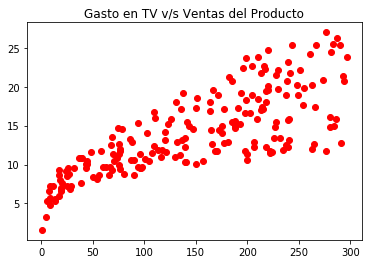

In [35]:
#graficamos nube de puntos para visualizar la correlacion
import matplotlib.pyplot as plt
plt.plot(data_ads["TV"], data_ads["Sales"],"ro")
plt.title("Gasto en TV v/s Ventas del Producto")

Text(0.5,1,'Gasto en Radio v/s Ventas del Producto')

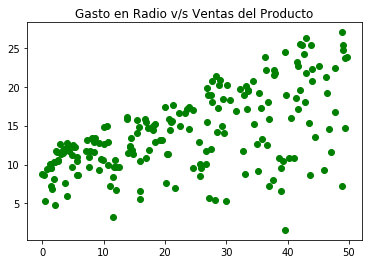

In [39]:
#en este caso la correlacion no es tan compacta ni clara
plt.plot(data_ads["Radio"], data_ads["Sales"],"go")
plt.title("Gasto en Radio v/s Ventas del Producto")

Text(0.5,1,'Gasto en Periodico v/s Ventas del Producto')

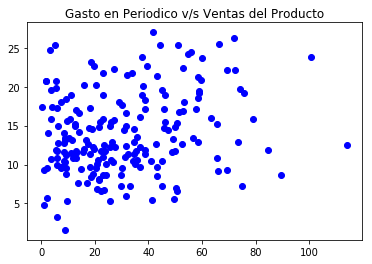

In [40]:
#en este caso la correlacion es muy baja, se obsera una gran dispersion de los datos
plt.plot(data_ads["Newspaper"], data_ads["Sales"],"bo")
plt.title("Gasto en Periodico v/s Ventas del Producto")

In [42]:
#Calculando la correlacion directamente
data_ads = pd.read_csv("../datasets/ads/Advertising.csv")
data_ads.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


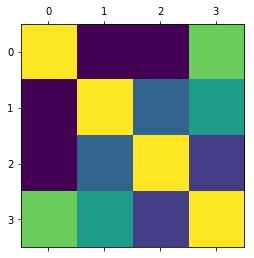

In [43]:
#lo representamos graifcamente, los cuadrados verdes representan las variables mas correlacionadas, las amarillas se descartan
#son las variabls contrastadas ante si mismas
plt.matshow(data_ads.corr())